# Using the Kolmogorov-Smirnov Test for Historical Return Distributions 

Trying to understand the distribution of Ethereum (ETH), Bitcoin (BTC) & Solana (SOL) returns


In [114]:
# importing libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import yfinance as yf
import matplotlib.pyplot as plt

In [115]:
# go to https://finance.yahoo.com/crypto/ and choose whichever tickers you want 

tickers = ["BTC-USD", "ETH-USD", "SOL-USD"]
ohlcv_data = {}

In [116]:
# choose your time period and interval (feel free to use a different API)
for ticker in tickers:
    temp = yf.download(ticker, period = '10y', interval='1d')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [117]:
for ticker, df in ohlcv_data.items():
    print(f"Summary for {ticker}:")
    print(f"Head of {ticker}:")
    print(df.head())
    print("\n")
    print(f"Summary statistics for {ticker}:")
    print(df.describe())
    print("\n")

Summary for BTC-USD:
Head of BTC-USD:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


Summary statistics for BTC-USD:
               Open          High           Low         Close     Adj Close  \
count   3419.000000   3419.000000   3419.000000   3419.000000   3419.000000   
mean   14788.255735  15132.925706  14416.489301  14798.842992  14798.842992   
std    1631

In [118]:
# Calculating arithmetic daily returns

for ticker, df in ohlcv_data.items():
    df['Daily Return'] = df['Close'].pct_change() * 100 
    df['Daily Return'] = df['Daily Return'].shift(-1) # shifting the daily returns by one row to not have NA values
    print(f"Daily returns for {ticker}:")
    print(df['Daily Return'].head(10))
    print("\n")

Daily returns for BTC-USD:
Date
2014-09-17   -7.192558
2014-09-18   -6.984265
2014-09-19    3.573492
2014-09-20   -2.465854
2014-09-21    0.835210
2014-09-22    8.364742
2014-09-23   -2.888081
2014-09-24   -2.748309
2014-09-25   -1.736994
2014-09-26   -1.212833
Name: Daily Return, dtype: float64


Daily returns for ETH-USD:
Date
2017-11-09   -6.741069
2017-11-10    5.155507
2017-11-11   -2.152342
2017-11-12    2.860599
2017-11-13    6.603711
2017-11-14   -1.265884
2017-11-15   -0.729843
2017-11-16    0.444211
2017-11-17    4.578298
2017-11-18    1.948721
Name: Daily Return, dtype: float64


Daily returns for SOL-USD:
Date
2020-04-10   -18.320200
2020-04-11    13.605233
2020-04-12   -11.861102
2020-04-13   -14.901284
2020-04-14    -2.307510
2020-04-15     6.829797
2020-04-16    -4.355430
2020-04-17     3.082666
2020-04-18   -10.883490
2020-04-19   -11.229077
Name: Daily Return, dtype: float64




In [119]:
# Calculating mean, standard deviation, skewness and kurtosis for arithmetic daily returns

for ticker, df in ohlcv_data.items():
    df['Daily Return'] = df['Close'].pct_change() * 100 
    df['Daily Return'] = df['Daily Return'].shift(-1) # shifting the daily returns by one row to not have NA values
    
    daily_returns = df['Daily Return'].dropna() 

    print(f"Moments for {ticker} Daily Returns:")
    print(f"Mean: {daily_returns.mean()}")
    print(f"Standard Deviation: {daily_returns.std()}")
    print(f"Skewness: {daily_returns.skew()}")
    print(f"Kurtosis: {daily_returns.kurtosis()}")
    print("\n")

Moments for BTC-USD Daily Returns:
Mean: 0.20052925454928222
Standard Deviation: 3.693115539829393
Skewness: -0.1392655129868627
Kurtosis: 7.568687618975761


Moments for ETH-USD Daily Returns:
Mean: 0.19916222521712093
Standard Deviation: 4.722933314915472
Skewness: -0.21238637565106494
Kurtosis: 6.108103017678479


Moments for SOL-USD Daily Returns:
Mean: 0.5908261283932246
Standard Deviation: 7.259608677355966
Skewness: 0.5111799449702389
Kurtosis: 4.852251765684578




In [120]:
# Calculating log returns with 1-day rolling window
# Calculating mean, standard deviation, skewness and kurtosis for log returns with 1-day rolling window

for ticker, df in ohlcv_data.items():
    df['Log Return'] = np.log(1 + df['Close'].pct_change()) * 100
    df['Log Return'] = df['Log Return'].shift(-1)  
    
    log_returns = df['Log Return'].dropna()  

    print(f"Statistics for {ticker} Log Returns (1-day rolling):")
    print(f"Mean: {log_returns.mean()}")
    print(f"Standard Deviation: {log_returns.std()}")
    print(f"Skewness: {log_returns.skew()}")
    print(f"Kurtosis: {log_returns.kurtosis()}")
    print("\n")

Statistics for BTC-USD Log Returns (1-day rolling):
Mean: 0.13164841117947707
Standard Deviation: 3.7220389793206707
Skewness: -0.7614955828890156
Kurtosis: 11.418424536101828


Statistics for ETH-USD Log Returns (1-day rolling):
Mean: 0.08587029725732316
Standard Deviation: 4.787861206706372
Skewness: -0.9275899413824142
Kurtosis: 10.893099194699184


Statistics for SOL-USD Log Returns (1-day rolling):
Mean: 0.3298712957192536
Standard Deviation: 7.217388436843062
Skewness: -0.2746629222145272
Kurtosis: 6.247866872291494




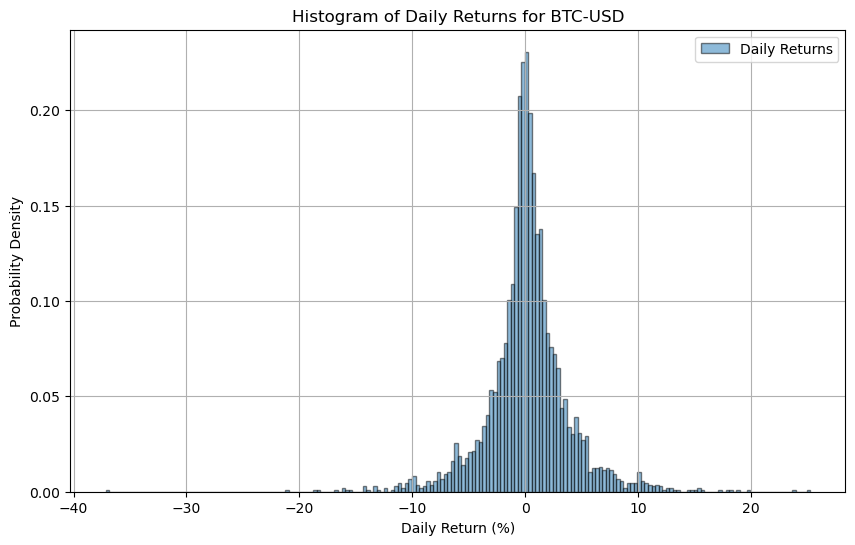

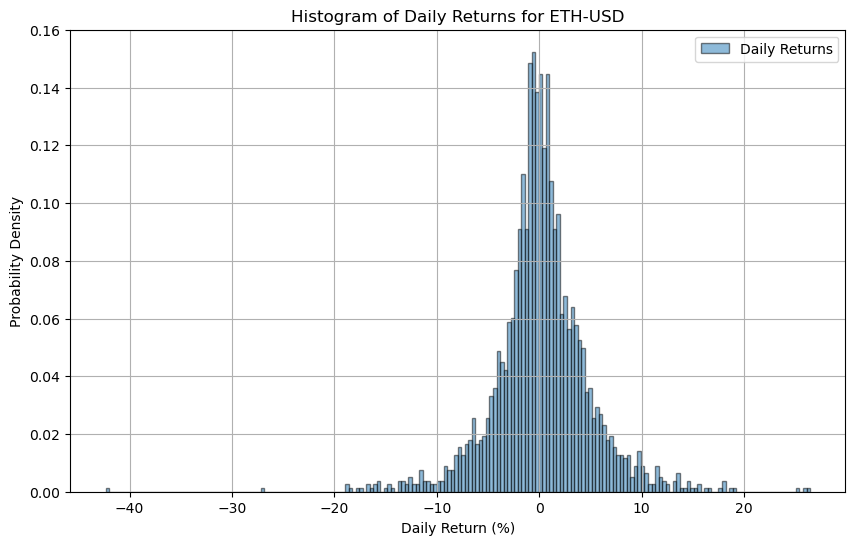

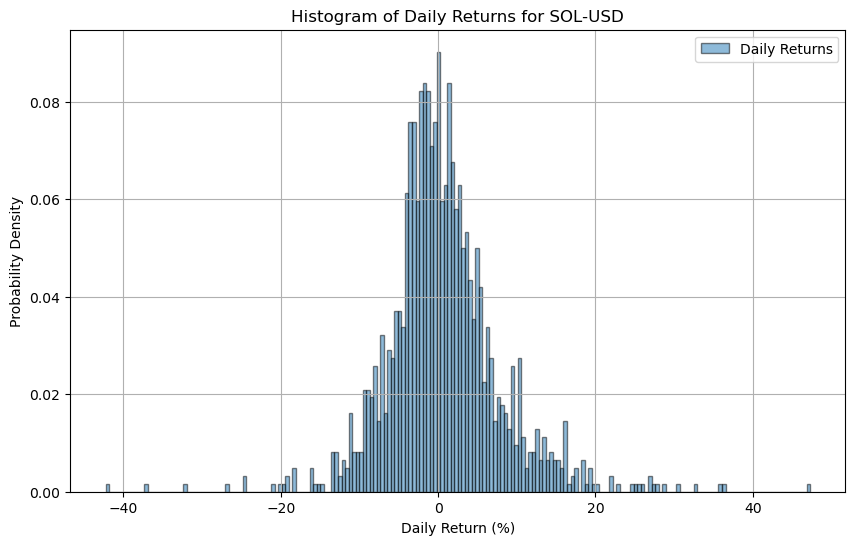

In [121]:
# plotting histogram of arithmetic daily returns for each ticker

for ticker, df in ohlcv_data.items():
    plt.figure(figsize=(10, 6))
    plt.hist(df['Daily Return'].dropna(), bins=200, edgecolor='black', alpha=0.5, density=True, label='Daily Returns')
    plt.title(f"Histogram of Daily Returns for {ticker}")
    plt.xlabel("Daily Return (%)")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.legend()
    plt.show()

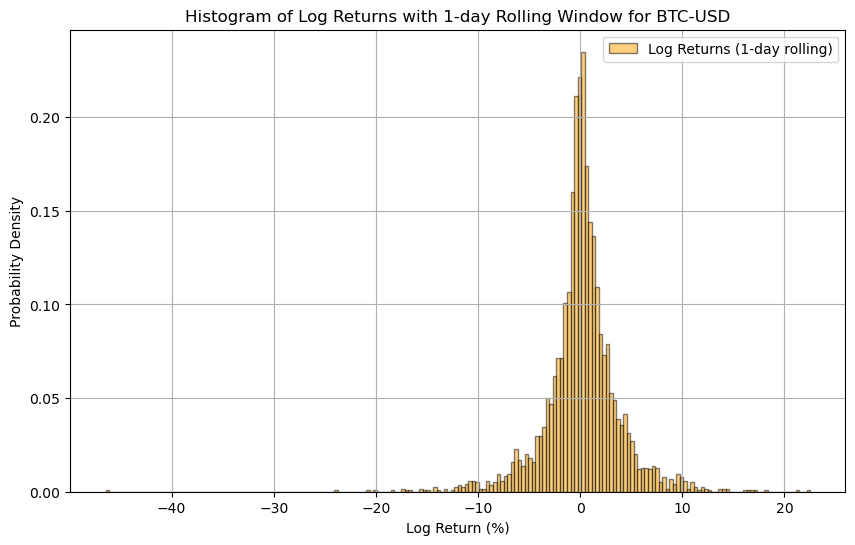

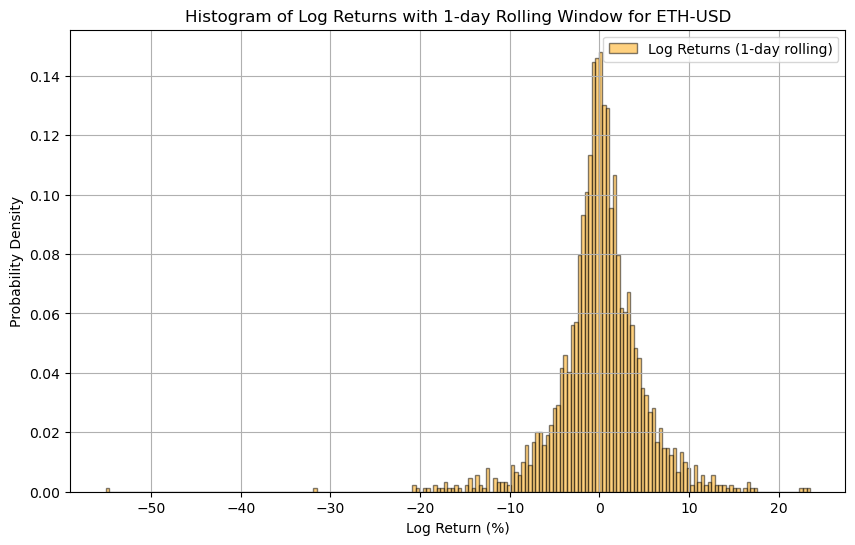

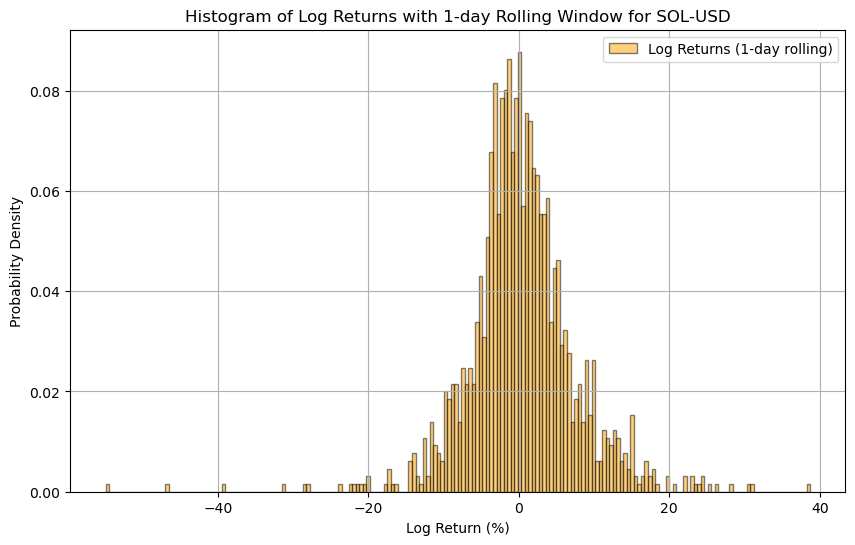

In [122]:
# calculating 1-day rolling average of log returns
# plotting histogram of 1-day rolling average log returns
for ticker, df in ohlcv_data.items():
    df['Log Return (1-day rolling)'] = df['Log Return'].rolling(window=1).mean()  
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(df['Log Return (1-day rolling)'].dropna(), bins=200, edgecolor='black', alpha=0.5, color='orange', density=True, label='Log Returns (1-day rolling)')
    plt.title(f"Histogram of Log Returns with 1-day Rolling Window for {ticker}")
    plt.xlabel("Log Return (%)")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.legend()
    plt.show()

In [126]:
# defining distribution types (choose any distributions from https://docs.scipy.org/doc/scipy/reference/stats.html)
distribution_types = ['norm', 't', 'laplace', 'powerlaw', 'genhyperbolic', 'invgauss']

results = []

for ticker, df in ohlcv_data.items():
    log_returns = df['Log Return (1-day rolling)'].dropna()
    print(f"Kolmogorov-Smirnov Test Results for {ticker} (1-day rolling average log returns):")

# performing the Kolmogorov-Smirnov test on log returns
# calculating the KS-statistic, P-value & Akaike Information Criterion (AIC) for each distribution

    for distribution_type in distribution_types:
        dist_params = getattr(stats, distribution_type).fit(log_returns)
        ks_statistic, ks_pvalue = stats.kstest(log_returns, distribution_type, args=dist_params)
        distribution = getattr(stats, distribution_type)
        aic = distribution.logpdf(log_returns, *dist_params).sum() - len(dist_params)
        
        # Append the results to the list
        results.append({
            "Ticker": ticker,
            "Distribution": distribution_type,
            "KS Statistic": ks_statistic,
            "P-value": ks_pvalue,
            "AIC": aic
        })

results_df = pd.DataFrame(results)
print(results_df)

Kolmogorov-Smirnov Test Results for BTC-USD (1-day rolling average log returns):
Kolmogorov-Smirnov Test Results for ETH-USD (1-day rolling average log returns):
Kolmogorov-Smirnov Test Results for SOL-USD (1-day rolling average log returns):
     Ticker   Distribution  KS Statistic        P-value           AIC
0   BTC-USD           norm      0.105271   1.951769e-33  -9343.612268
1   BTC-USD              t      0.026160   1.826014e-02  -8818.853839
2   BTC-USD        laplace      0.036427   2.239247e-04  -8804.057552
3   BTC-USD       powerlaw      0.458313   0.000000e+00 -13378.328919
4   BTC-USD  genhyperbolic      0.014662   4.501905e-01  -8767.749160
5   BTC-USD       invgauss      0.422662   0.000000e+00 -13386.050198
6   ETH-USD           norm      0.091552   5.321920e-17  -6774.515563
7   ETH-USD              t      0.021779   2.286807e-01  -6513.751576
8   ETH-USD        laplace      0.022401   2.019050e-01  -6504.506036
9   ETH-USD       powerlaw      0.427303   0.000000e+00  